In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [51]:
pd.set_option('display.max_colwidth', None)

In [52]:
df = pd.read_csv( 'lin_fit.csv', header=None, sep=r'\s+')
df.head()

,0,1,2
0,-4.06,-44.37,25.19
1,3.91,31.40,23.98
2,-5.70,-11.56,19.81
3,-9.76,-37.03,25.35
4,6.90,25.92,20.72


In [53]:
df.columns = [ 'x', 'y', 'std_y' ]
df

,x,y,std_y
0,-4.06,-44.37,25.19
1,3.91,31.40,23.98
2,-5.70,-11.56,19.81
3,-9.76,-37.03,25.35
4,6.90,25.92,20.72
5,-14.09,-56.86,14.31
6,-13.31,-57.54,28.80
7,4.37,51.62,25.27
8,5.31,25.66,15.18
9,-13.25,-43.26,18.39


In [54]:
x_data = df['x'].values
y_data = df['y'].values
std_y_data = df['std_y'].values

weights = 1 / std_y_data**2  

In [73]:
# Calculate weighted averages for x_data, y, x_data^2, and x_data*y
weighted_mean_x = np.sum(weights * x_data) / np.sum(weights)
weighted_mean_y = np.sum(weights * y_data) / np.sum(weights)
weighted_mean_x2 = np.sum(weights * x_data**2) / np.sum(weights)
weighted_mean_xy = np.sum(weights * x_data * y_data) / np.sum(weights)

# Calculate the gradient (m) and intercept (c) based on the least-squares formulas
m_manual = (weighted_mean_xy - weighted_mean_x * weighted_mean_y) / (weighted_mean_x2 - weighted_mean_x**2)
c_manual = weighted_mean_y - m_manual * weighted_mean_x

# Calculate the errors for m and c
m_err_manual = np.sqrt(1 / (np.sum(weights) * (weighted_mean_x2 - weighted_mean_x**2)))
c_err_manual = np.sqrt(weighted_mean_x2 / (np.sum(weights) * (weighted_mean_x2 - weighted_mean_x**2)))

# Calculate the covariance matrix
cov_m_c = -weighted_mean_x / (np.sum(weights) * (weighted_mean_x2 - weighted_mean_x**2))
cov_matrix_manual = np.array([[m_err_manual**2, cov_m_c], [cov_m_c, c_err_manual**2]])

# Calculate chi-squared
y_fit_manual = m_manual * x_data + c_manual
chi_squared_manual = np.sum(((y_data - y_fit_manual) / std_y_data) ** 2)
dof_manual = len(x_data) - 2  # degrees of freedom

datas = {
    'Metric': [
        'Gradient', 
        'Gradient With Error', 
        'Intercept', 
        'Intercept With Error', 
        'Covariance Matrix', 
        'Chi-Squared', 
        'Degrees of Freedom'
    ],
    'Value': [
        f'{m_manual: .3f}', 
        f'{m_err_manual: .3f}', 
        f'{c_manual: .3f}', 
        f'{c_err_manual: .3f}', 
        f"[[{cov_matrix_manual[0, 0]:.3f}, {cov_matrix_manual[0, 1]:.3f}]\n [{cov_matrix_manual[1, 0]:.3f}, {cov_matrix_manual[1, 1]:.3f}]]",
        f'{chi_squared_manual: .3f}', 
        f'{dof_manual}'
    ]
}

dataFrame = pd.DataFrame.from_dict( datas )
dataFrame['Value'] = dataFrame['Value'].str.replace('\n', '<br>', regex=False)
display(dataFrame.style.set_properties(**{'white-space': 'pre-wrap'}))

,Metric,Value
0,Gradient,3.844
1,Gradient With Error,0.650
2,Intercept,0.573
3,Intercept With Error,5.962
4,Covariance Matrix,"[[0.422, 0.968] [0.968, 35.551]]"
5,Chi-Squared,5.256
6,Degrees of Freedom,9


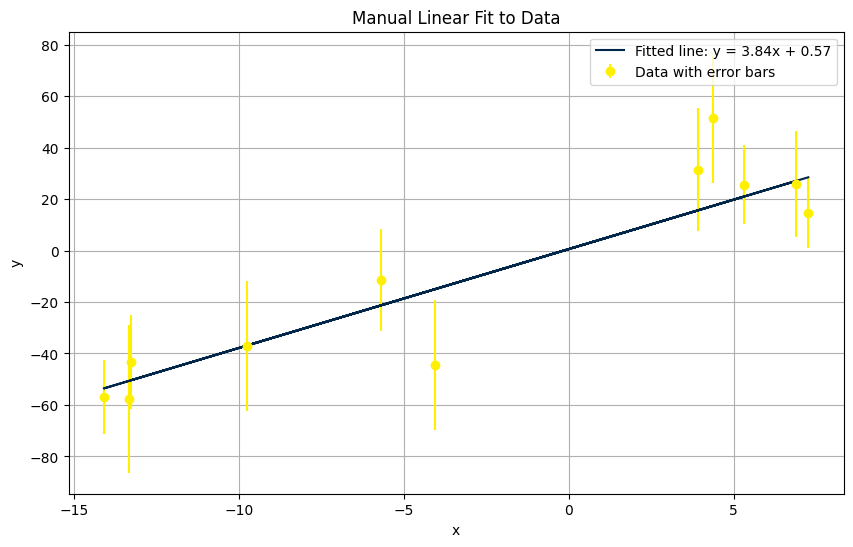

In [67]:
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data, yerr=std_y_data, fmt='o', label="Data with error bars", color='#ffef00')
plt.plot(x_data, y_fit_manual, color='#002749', label=f"Fitted line: y = {m_manual:.2f}x + {c_manual:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Manual Linear Fit to Data")
plt.grid()
plt.show()